## dynamic programming fundament

- from [B站-灯哥](https://www.bilibili.com/video/av18512769/?spm_id_from=333.788.videocard.0)

### max of list problem - 1-D array
```
select numbers in the list to sum up maximum 
    s.t. can't select numbers aroud selected number
```

```python
lst_org = [1,2,4,1,7,8,3]
```

$$
opt_i=max
\begin{cases}
\begin{cases}
opt_{i-2}+v_i & True \\
opt_{i-1} & False \\
\end{cases} &i>=2 \\
opt_0 = v_0 & i = 0 \\
opt_1 = max(opt_0, v_1)& i = 1 \\
\end{cases} 
$$

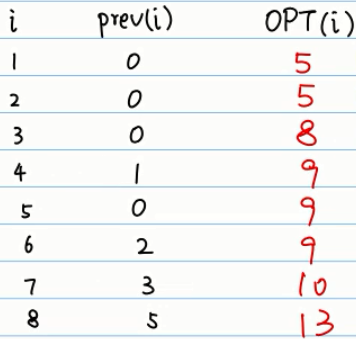

In [50]:
%%time
# lst_org = [1,2,4,1,7,8,3]

from random import shuffle
lst_org = list(range(1,30))
shuffle(lst_org)
print(lst_org)

[3, 15, 7, 25, 17, 11, 4, 2, 14, 26, 21, 29, 1, 8, 16, 10, 9, 22, 23, 13, 18, 20, 27, 6, 5, 12, 24, 19, 28]
Wall time: 1e+03 µs


In [51]:
%%time
# recurrence version - Tail recursive optimization
def rec_opt(lst, i):
    if i==0:
        return lst[i]
    elif i==1:
        return max(
            lst[i-1], 
            lst[i]
        )
    else:
        return max(
            rec_opt(lst, i-2)+lst[i],
            rec_opt(lst, i-1)
        )
    
print(rec_opt(lst_org, len(lst_org)-1))

258
Wall time: 458 ms


In [57]:
from numpy import array
from numpy import zeros

In [58]:
%%time
# dynamic version
def dp_opt(lst, i):
    opt = zeros(len(lst))
    opt[0] = lst[0]
    opt[1] = max(lst[1], lst[0])
    for i in range(2, len(lst)):
        true_opt = opt[i-2]+lst[i]
        false_opt = opt[i-1]
        opt[i] = max(true_opt, false_opt)
    return opt[len(lst)-1]

print(dp_opt(lst_org, len(lst_org)-1))

258.0
Wall time: 1e+03 µs


### sum of list problem - 2-D array

```
selected numbers of list to which sum up equal appoited number
```

```python
lst_org = [3,34,4,12,5,2]

int_tar = 9
```

$$
subset_{X_i,s}=
\begin{cases}
1, & s=0 \\
X_i=s, & i=0 \\
subset_{X_{i-1},s}, & X_i>s\\
\begin{cases}
subset_{X_{i-1}\,,s-X_i},& True \\
subset_{X_{i-1}\,,s},& False
\end{cases} & X_i<s\\
\end{cases} 
$$

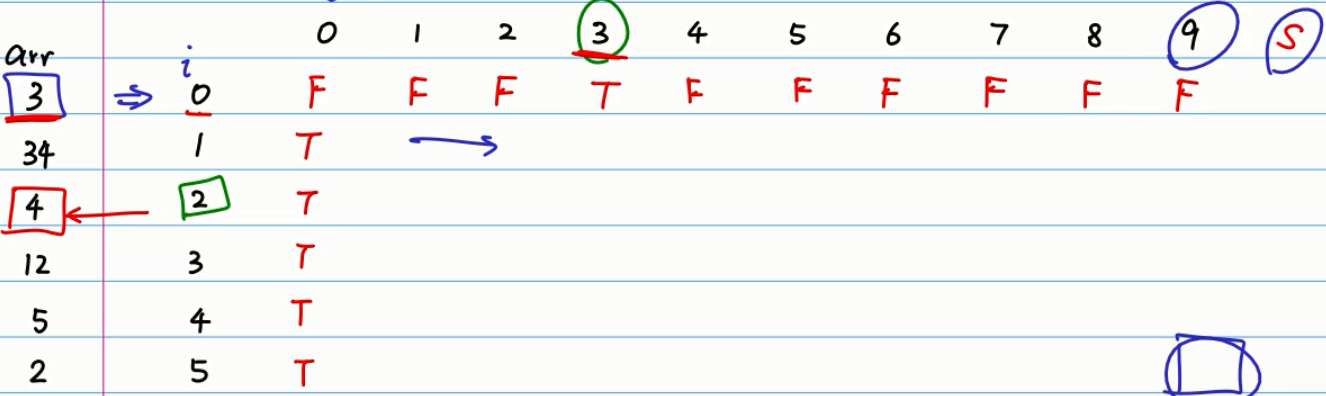

In [98]:
%%time
# lst_org = [3,34,4,12,5,2]
from random import shuffle
lst_org = list(range(1,1000))
shuffle(lst_org)
print(len(lst_org))

int_tar = 9

999
Wall time: 4 ms


In [109]:
%%time
def rec_subset(lst, i,tar):
    # iterated data fullfill current target
    if tar==0:
        return True
    # iteration is end
    elif i==0:
        return lst[i]==tar
    # current value is over current target
    elif lst[i]>tar:
        return rec_subset(lst, i-1, tar)
    # current value maybe fullfill target
    else:
        return rec_subset(lst, i-1, tar-lst[i]) or rec_subset(lst, i-1, tar)
    
print(rec_subset(lst_org, len(lst_org)-1, int_tar))

True
Wall time: 1e+03 µs


In [108]:
%%time
def dp_subset(lst, tar):
    subset = zeros([len(lst), tar+1], dtype=bool)        # `+1` 0 state
    
    subset[0, :] = False                  # lst[0]!=tar
    if 0<=lst[0]<=tar:
        subset[0, lst[0]] = True              # tar==lst[0]
    subset[:, 0] = True                   # tar==0
    
    for i in range(1, len(lst)):          # iterate all element of `lst` except c_0, row of 2-D array
        for t in range(1, tar+1):         # iterate all element of `lst` except r_0, column of 2-D array
            if lst[i]>tar:
                subset[i, t] = subset[i-1, t]
            else:
                tu_ca = subset[i-1, t-lst[i]]
                fl_ca = subset[i-1, t]
                subset[i, t] = tu_ca or fl_ca
    r, c = subset.shape
    return subset[r-1, c-1]

print(dp_subset(lst_org, int_tar))

True
Wall time: 5 ms


## DP advanced
- from [NLP camp-greedyai]

 ### Maximum Subarray - int
 
- select numbers in `lst`(contained negative number) to sum up maximum
    - $$s.t. \begin{cases}cur_max=last_max+sub_array[i]&0<sub_array[i]<last_max\\cur_max=last_max &sub_array[i]>last_max\end{cases}$$
    

```python
lst_org = [-2,1,-3,4,-1,2,1,-5,4]
```

$$
M_i = max
\begin{cases}
M_{i-1}+v_i & True\\
M_{i-1} & False \\
\end{cases} i>=0
$$

In [1]:
lst_org = [-2,1,-3,4,-1,2,1,-5,4]
int_expected = 6

In [3]:
%%time
# dynamic programming version
def dp_subarray(lst):
    if len(lst)==1:
        return lst[0]
    max_ret = lst[0]
    
    cur_max = last_max = lst[0]
    
    for i in range(1, len(lst)):
        # whether select current value to form current maximum
        cur_max = max(last_max+lst[i], lst[i])
#         if last_max<0:
#             cur_max = lst[i]
#         else:
#             cur_max = last_max + lst[i]
            
        # whether current programme is better than rest optimal programme
        if cur_max > max_ret:
            max_ret = cur_max
        last_max = cur_max
    return max_ret
            
print(dp_subarray(lst_org))

6
Wall time: 0 ns


### Longest Increasing Subsequence - 1-D array

- select numbers in list that form a increasing sequence 
$$
s.t. \;opt_i=max
\begin{cases}
opt_{prev(i-1)}+1&True \\
opt_{i-1},&False
\end{cases}
$$

```python
lst_org = [10,9,2,5,3,7,101,18] # 4, [2,3,7,101]
# lst_org = [10,9,2,5,1,7,101,18]
```

$$
L_j = max_{i<j,A_i<A_j}[L(i)]+1
$$

In [ ]:
lst_org = [10,9,2,5,3,7,101,18] # 4, [2,3,7,101]
# lst_org = [10,9,2,5,1,7,101,18]

In [23]:
# dynamic programming of  Longest Increasing Sub-sequence
##  use integer
def dp_liss(lst):
    ori_len = len(lst)
    opt = [1 for i in range(ori_len)]
    
    if ori_len<=1:
        return ori_len
    
    for cur_idx in range(1,ori_len):
        for com_idx in range(0, cur_idx):
            if lst[com_idx]<lst[cur_idx]:
                opt[cur_idx] = max(opt[com_idx]+1, opt[cur_idx])
    return opt

dp_liss(lst_org)

[1, 2, 1, 3, 2, 3, 3, 1, 4]